## SyntheticPinchoffDataProvider Examples
This notebook demonstrates use and resulting output of the SyntheticPinchoffDataProvider

![input parameters](example.png "Input Parameters")

In [1]:
import logging
import os
import numpy as np

from qcodes import Station, Measurement, load_or_create_experiment
from qcodes.tests.instrument_mocks import DummyInstrument
from qcodes.dataset.plotting import plot_dataset

from sim.data_providers import SyntheticPinchoffDataProvider
from sim.qcodes_mocks import MockSingleQuantumDotInstrument

In [2]:
# Create a mock instrument and get its underlying simulator
qd_mock_instrument = MockSingleQuantumDotInstrument()
qdsim = qd_mock_instrument.mock_device

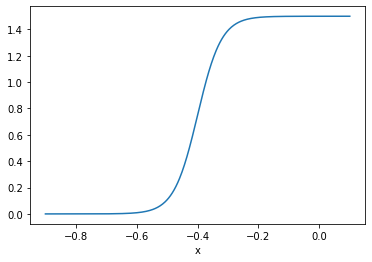

In [3]:
# Basic Ideal Pinchoff
dp = SyntheticPinchoffDataProvider(
    qd_mock_instrument.mock_device.plunger,
    min = 0.0, max = 1.5, center = -0.4, width = 0.5, lower_tilt = 0, upper_tilt= 0, noise = 0.0, flip = False
) # ^^^^^^^^^  ^^^^^^^^^  ^^^^^^^^^^^^^  ^^^^^^^^^^^
dp.raw_data.plot()

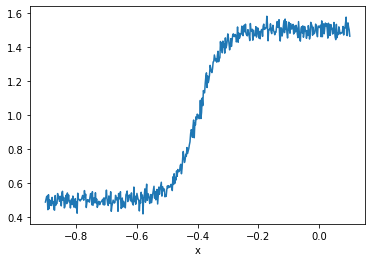

In [4]:
# Basic Pinchoff with gaussian noise
dp = SyntheticPinchoffDataProvider(
    qd_mock_instrument.mock_device.plunger,
    min = 0.5, max = 1.5, center = -0.4, width = 0.5, lower_tilt = 0, upper_tilt= 0, noise = 0.03, flip = False
) #                                                                                  ^^^^^^^^^^^^^
dp.raw_data.plot()

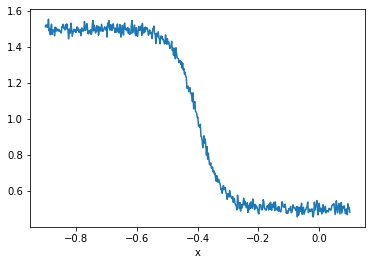

In [5]:
# Flipped Pinchoff
dp = SyntheticPinchoffDataProvider(
    qd_mock_instrument.mock_device.plunger,
    min = 0.5, max = 1.5, center = -0.4, width = 0.5, lower_tilt = 0, upper_tilt = 0, noise = 0.02, flip = True
) #                                                                                                 ^^^^^^^^^^^
dp.raw_data.plot()

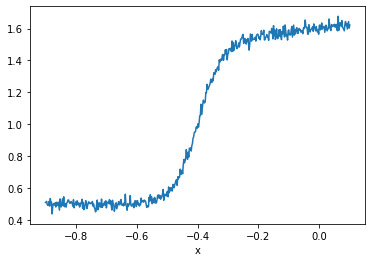

In [6]:
# Basic Pinchoff with upper Tilt
dp = SyntheticPinchoffDataProvider(
    qd_mock_instrument.mock_device.plunger,
    min = 0.5, max = 1.5, center = -0.4, width = 0.5, lower_tilt = 0, upper_tilt = 4, noise = 0.02, flip = False
) #                                                                   ^^^^^^^^^^^^^^^
dp.raw_data.plot()

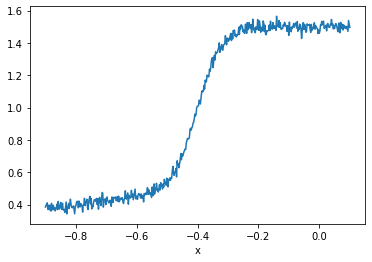

In [7]:
# Basic Pinchoff with lower Tilt
dp = SyntheticPinchoffDataProvider(
    qd_mock_instrument.mock_device.plunger,
    min = 0.5, max = 1.5, center = -0.4, width = 0.5, lower_tilt = 4, upper_tilt = 0, noise = 0.02, flip = False
) #                                                   ^^^^^^^^^^^^^^^
dp.raw_data.plot()

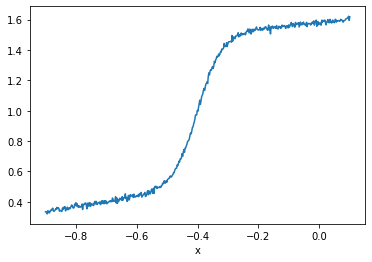

In [8]:
# Basic Pinchoff with upper and lower tilt
dp = SyntheticPinchoffDataProvider(
    qd_mock_instrument.mock_device.plunger,
    min = 0.5, max = 1.5, center = -0.4, width = 0.5, lower_tilt = 3, upper_tilt = 5, noise = 0.01, flip = False
) #                                                   ^^^^^^^^^^^^^^  ^^^^^^^^^^^^^^
dp.raw_data.plot()

## Run a pinchoff measurement on a Plunger configured with a SyntheticPinchoffDataProvider

In [9]:
# Create the station and add the mock quantum dot instrument
exp = load_or_create_experiment("simtest")
station = Station()
station.add_component(qd_mock_instrument, name="qdmock")

'qdmock'

In [10]:
# Create the data provider to use for the right plunger pinch-off measurement
# binding the sim.r_plunger pin as the input data provider
pinchoff_data = SyntheticPinchoffDataProvider(
    qd_mock_instrument.mock_device.plunger,
    min = 0.5,
    max = 1.5,
    center = -0.4,
    width = 0.5,
    upper_tilt = 8,
    noise = 0.03
)


# Configure the simulator's drain pin to use the backing data
qdsim.drain.set_data_provider(pinchoff_data)

In [11]:
# run the measurement
meas = Measurement(exp = exp, station = station)
meas.register_parameter(qd_mock_instrument.plunger)
meas.register_parameter(qd_mock_instrument.drain, setpoints=(qd_mock_instrument.plunger,))
meas.write_period = 2

n_points = 200
with meas.run() as datasaver:
    for voltage in np.linspace(0.0, -0.8, n_points):
        qd_mock_instrument.plunger.set(voltage)
        current = qd_mock_instrument.drain.get()
        datasaver.add_result((qd_mock_instrument.plunger, voltage), (qd_mock_instrument.drain, current))

    dataset = datasaver.dataset

Starting experimental run with id: 119. 


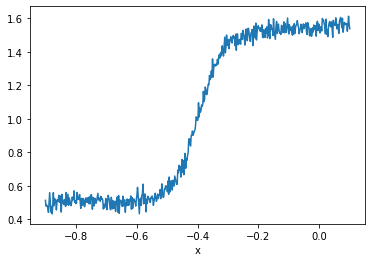

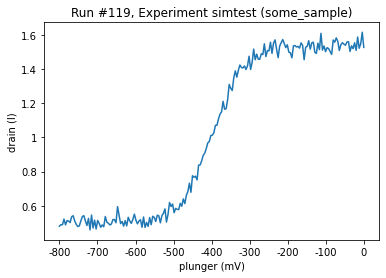

In [12]:
pinchoff_data.raw_data.plot()
_ = plot_dataset(dataset)